In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [8]:
filep = "/content/drive/MyDrive/EDA/Global_Terrorism.csv"

In [9]:
df = pd.read_csv(filep, encoding="latin-1")

In [10]:
df.shape

(181691, 135)

In [11]:
df.head()

eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaN       58   
1  197000000002   1970       0     0        NaN         0        NaN      130   
2  197001000001   1970       1     0        NaN         0        NaN      160   
3  197001000002   1970       1     0        NaN         0        NaN       78   
4  197001000003   1970       1     0        NaN         0        NaN      101   

          country_txt  region  ... addnotes scite1 scite2  scite3  dbsource  \
0  Dominican Republic       2  ...      NaN    NaN    NaN     NaN      PGIS   
1              Mexico       1  ...      NaN    NaN    NaN     NaN      PGIS   
2         Philippines       5  ...      NaN    NaN    NaN     NaN      PGIS   
3              Greece       8  ...      NaN    NaN    NaN     NaN      PGIS   
4               Japan       4  ...      NaN    NaN    NaN     NaN      PGIS   

   INT_LOG  INT_IDEO INT_MISC INT_ANY  related  
0        0         0        0       0      NaN  
1        0         1        1       1      NaN  
2       -9        -9        1       1      NaN  
3       -9        -9        1       1      NaN  
4       -9        -9        1       1      NaN  

[5 rows x 135 columns]

In [12]:
df.tail()

eventid  iyear  imonth  iday approxdate  extended resolution  \
181686  201712310022   2017      12    31        NaN         0        NaN   
181687  201712310029   2017      12    31        NaN         0        NaN   
181688  201712310030   2017      12    31        NaN         0        NaN   
181689  201712310031   2017      12    31        NaN         0        NaN   
181690  201712310032   2017      12    31        NaN         0        NaN   

        country  country_txt  region  ... addnotes  \
181686      182      Somalia      11  ...      NaN   
181687      200        Syria      10  ...      NaN   
181688      160  Philippines       5  ...      NaN   
181689       92        India       6  ...      NaN   
181690      160  Philippines       5  ...      NaN   

                                                   scite1  \
181686  "Somalia: Al-Shabaab Militants Attack Army Che...   
181687  "Putin's 'victory' in Syria has turned into a ...   
181688  "Maguindanao clashes trap tribe members," Phil...   
181689  "Trader escapes grenade attack in Imphal," Bus...   
181690  "Security tightened in Cotabato following IED ...   

                                                   scite2  \
181686  "Highlights: Somalia Daily Media Highlights 2 ...   
181687  "Two Russian soldiers killed at Hmeymim base i...   
181688                                                NaN   
181689                                                NaN   
181690  "Security tightened in Cotabato City," Manila ...   

                                                   scite3  \
181686  "Highlights: Somalia Daily Media Highlights 1 ...   
181687  "Two Russian servicemen killed in Syria mortar...   
181688                                                NaN   
181689                                                NaN   
181690                                                NaN   

                        dbsource  INT_LOG  INT_IDEO INT_MISC INT_ANY  related  
181686  START Primary Collection        0         0        0       0      NaN  
181687  START Primary Collection       -9        -9        1       1      NaN  
181688  START Primary Collection        0         0        0       0      NaN  
181689  START Primary Collection       -9        -9        0      -9      NaN  
181690  START Primary Collection       -9        -9        0      -9      NaN  

[5 rows x 135 columns]

In [14]:
df.columns.values.tolist()

['eventid',
 'iyear',
 'imonth',
 'iday',
 'approxdate',
 'extended',
 'resolution',
 'country',
 'country_txt',
 'region',
 'region_txt',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'vicinity',
 'location',
 'summary',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'alternative',
 'alternative_txt',
 'multiple',
 'success',
 'suicide',
 'attacktype1',
 'attacktype1_txt',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'targtype1',
 'targtype1_txt',
 'targsubtype1',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1',
 'natlty1_txt',
 'targtype2',
 'targtype2_txt',
 'targsubtype2',
 'targsubtype2_txt',
 'corp2',
 'target2',
 'natlty2',
 'natlty2_txt',
 'targtype3',
 'targtype3_txt',
 'targsubtype3',
 'targsubtype3_txt',
 'corp3',
 'target3',
 'natlty3',
 'natlty3_txt',
 'gname',
 'gsubname',
 'gname2',
 'gsubname2',
 'gname3',
 'gsubname3',
 'motive',
 'guncertain1',
 'guncertain2',
 'guncertain3',
 'individual',
 'nperps',
 'nperpcap',
 

In [15]:
df.rename(columns={'iyear':'Year', 'imonth':'Month', 'iday':'Day', 'country_txt':'Country_name', 'provstate':'State', 'region_txt':'Region', 'attacktype1_txt':'Attack_Type', 'target1':'Target', 'nkill':'Killed', 'nwound':'Wounded', 'gname':'Group', 'targtype1_txt':'Target_type', 'weaptype1_txt':'Weapon_type', 'motive':'Motive'}, inplace=True)

In [16]:
df=df[['Year','Month','Day','Country_name','State','Region','latitude','longitude','Attack_Type','Killed','Wounded','Group','Target','summary','Group','Target_type','Weapon_type','Motive']]

# **Exploratory Data Analysis**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3278ff2760>,
      dtype=object)

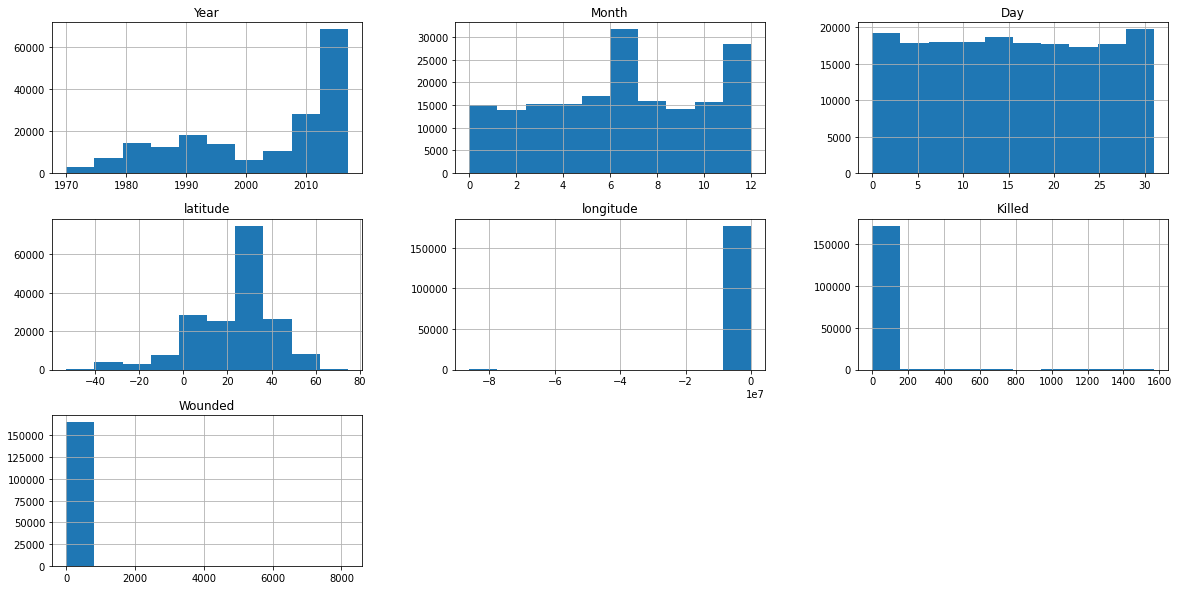

In [17]:
df.hist(figsize=(20,10))

In [18]:
df.describe()

Year          Month            Day       latitude  \
count  181691.000000  181691.000000  181691.000000  177135.000000   
mean     2002.638997       6.467277      15.505644      23.498343   
std        13.259430       3.388303       8.814045      18.569242   
min      1970.000000       0.000000       0.000000     -53.154613   
25%      1991.000000       4.000000       8.000000      11.510046   
50%      2009.000000       6.000000      15.000000      31.467463   
75%      2014.000000       9.000000      23.000000      34.685087   
max      2017.000000      12.000000      31.000000      74.633553   

          longitude         Killed        Wounded  
count  1.771340e+05  171378.000000  165380.000000  
mean  -4.586957e+02       2.403272       3.167668  
std    2.047790e+05      11.545741      35.949392  
min   -8.618590e+07       0.000000       0.000000  
25%    4.545640e+00       0.000000       0.000000  
50%    4.324651e+01       0.000000       0.000000  
75%    6.871033e+01       2.000000       2.000000  
max    1.793667e+02    1570.000000    8191.000000

# **Correlation Analysis**

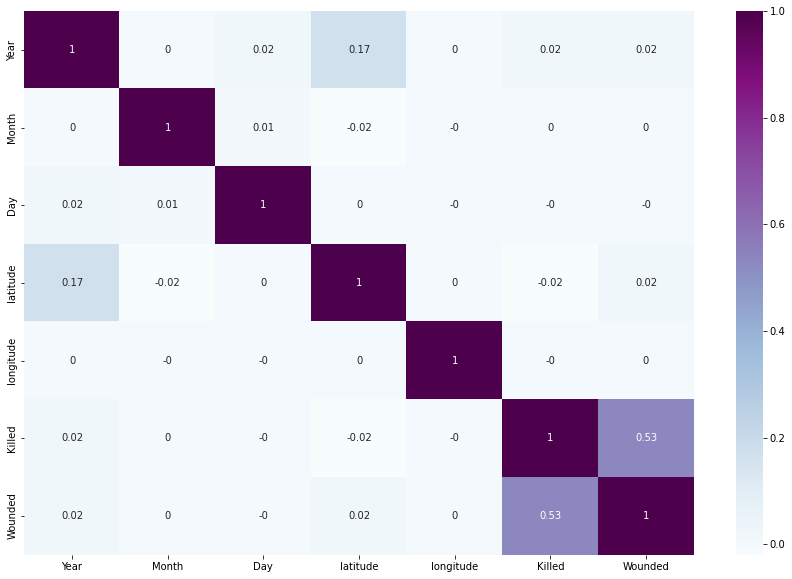

In [19]:
plt.figure(figsize=(15,10))
sns.heatmap(np.round(df.corr(),2), annot=True,  cmap='BuPu')

## **Terrorist Attacks by Region in each Year through Area Plot**

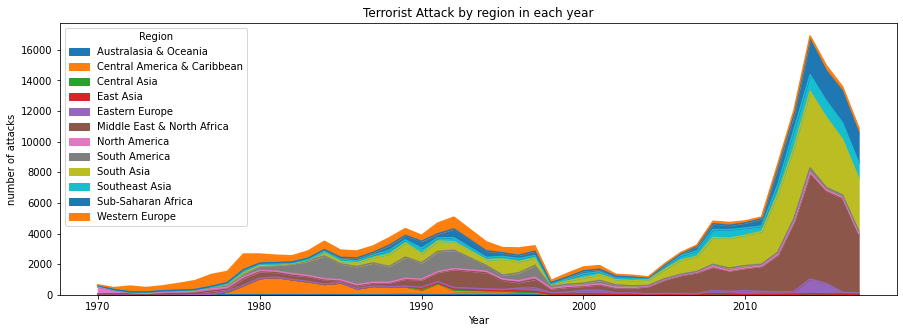

In [20]:
pd.crosstab(df.Year, df.Region).plot(kind='area', figsize=(15,5))
plt.title('Terrorist Attack by region in each year')
plt.ylabel('number of attacks')
plt.show()

**Number of Terrorist Activities Each Year**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


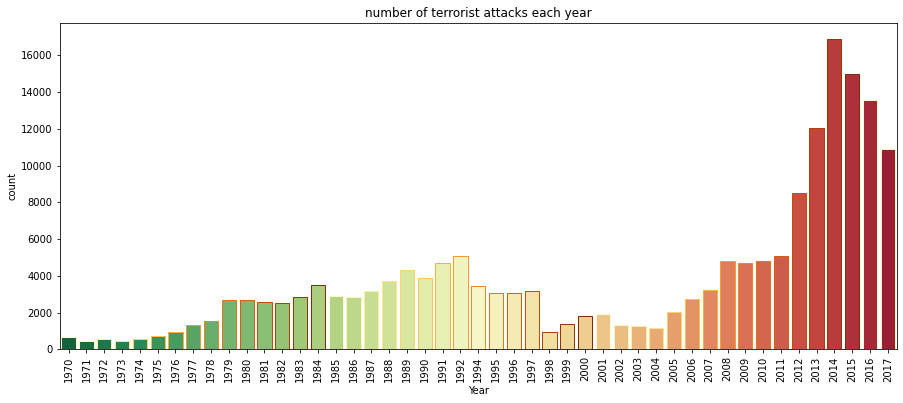

In [21]:
plt.subplots(figsize=(15,6))
sns.countplot('Year', data=df, palette='RdYlGn_r', edgecolor=sns.color_palette('YlOrBr', 15))
plt.xticks(rotation=90)
plt.title('number of terrorist attacks each year')
plt.show()

Since 2014 and 2015 has a large number of Terrorist activities.

Number of attack were there in 1970 & 2017 and also find percentage the attacks have incresed

In [22]:
Year = df.Year.value_counts().to_dict()
rate = ((Year[2017] - Year[1970]) / Year[2017])*100
print(Year[1970],'attacks happened in 1970 and', Year[2017],'attacks happened in 2017')
print('number of attacks from 1970 has increased by', np.round(rate,0),'% till 2017')

651 attacks happened in 1970 and 10900 attacks happened in 2017
number of attacks from 1970 has increased by 94.0 % till 2017


In [23]:
px.scatter(df, df.Wounded, df.Killed, hover_name='Country_name', animation_frame='Year', animation_group='Country_name', color='Attack_Type',
            range_color=[0.1], labels={'Killed':'Deaths', 'Wounded':'Casualities'},
            title='Number of casualities vs killed people in each country for each year')

## **Method of Attack**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



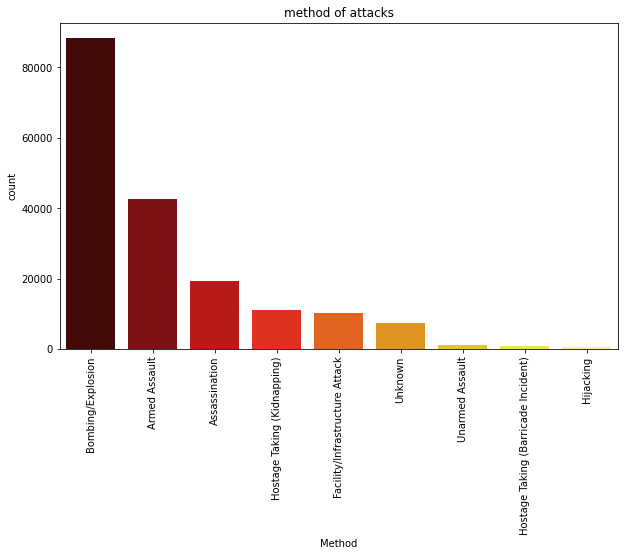

In [24]:
plt.figure(figsize=(10,6))
sns.countplot(df['Attack_Type'], order=df['Attack_Type'].value_counts().index, palette='hot')
plt.xticks(rotation=90)
plt.xlabel('Method')
plt.title('method of attacks')
plt.show()

## Since from the above chart it is clear that Bombing / Explosion method was mostly used

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



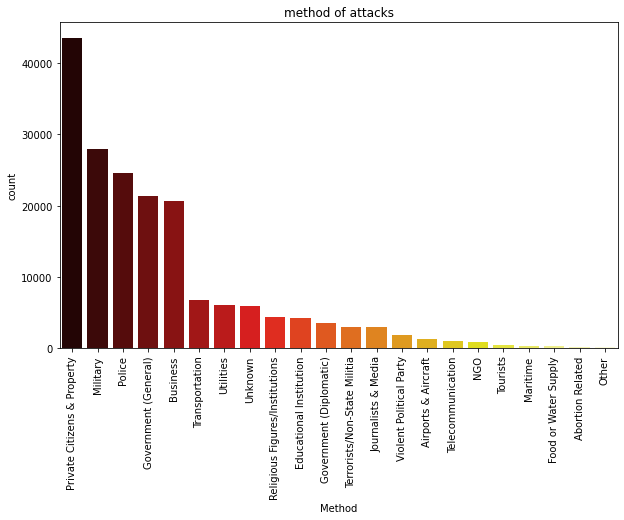

In [25]:
plt.figure(figsize=(10,6))
sns.countplot(df['Target_type'], order=df['Target_type'].value_counts().index, palette='hot')
plt.xticks(rotation=90)
plt.xlabel('Method')
plt.title('method of attacks')
plt.show()

## Total Number of Terrorist Attack in each country and regions using barplot

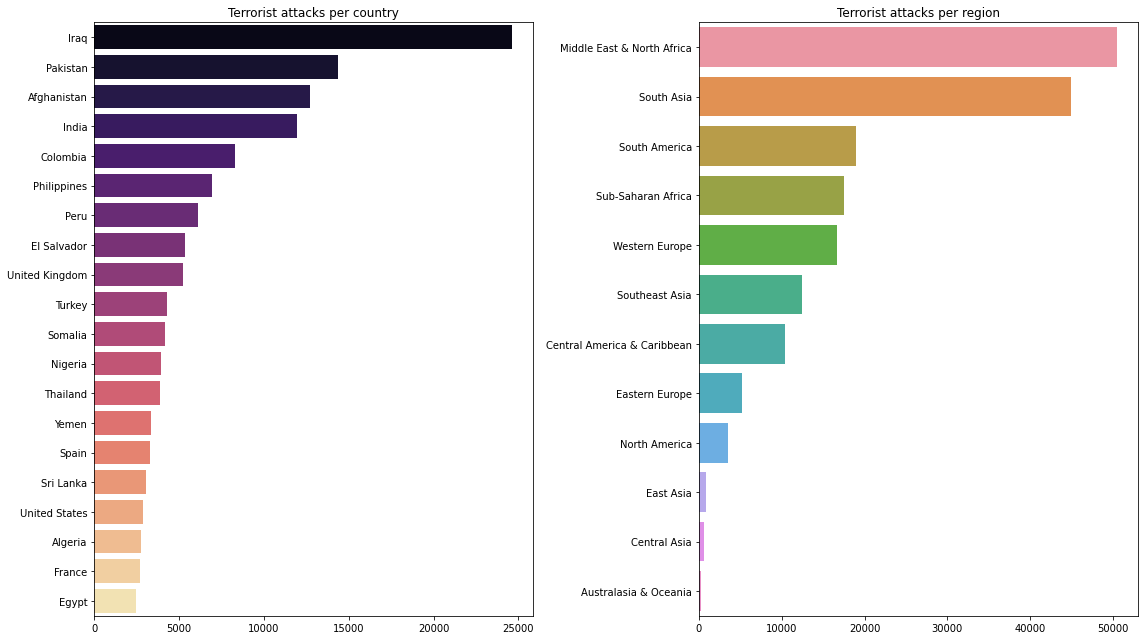

In [26]:
 fig,axes = plt.subplots(figsize=(16,9),nrows=1,ncols=2)
 sns.barplot(x = df['Country_name'].value_counts()[:20].values, y= df['Country_name'].value_counts()[:20].index, ax=axes[0], palette='magma');
 axes[0].set_title('Terrorist attacks per country')

sns.barplot(x = df['Region'].value_counts().values, y= df['Region'].value_counts().index, ax=axes[1]);
axes[1].set_title('Terrorist attacks per region')

fig.tight_layout()
 plt.show()

**Country suffered the maximun attacks (state the number) and the country suffered minimun attacks (state the number)**

In [27]:
max_count = df['Year'].max()
max_id = df['Year'].idxmax()
max_name = df['Country_name'][max_id]
min_count = df['Year'].min()
min_id = df['Year'].idxmin()
min_name = df['Country_name'][min_id]


In [28]:
print(max_name, 'has suffered maximum number of terror attacks of', max_count)
print(min_name, 'has suffered minimum number of terror attacks of', min_count)

Afghanistan has suffered maximum number of terror attacks of 2017
Dominican Republic has suffered minimum number of terror attacks of 1970


In [36]:
df = df.rename(columns={'Group':'Terrorist_group'})

df = df.iloc[:, list(range(14)) + list(range(15, 18))]

In [38]:
df.head()

Year  Month  Day        Country_name    State                       Region  \
0  1970      7    2  Dominican Republic      NaN  Central America & Caribbean   
1  1970      0    0              Mexico  Federal                North America   
2  1970      1    0         Philippines   Tarlac               Southeast Asia   
3  1970      1    0              Greece   Attica               Western Europe   
4  1970      1    0               Japan  Fukouka                    East Asia   

    latitude   longitude                     Attack_Type  Killed  Wounded  \
0  18.456792  -69.951164                   Assassination     1.0      0.0   
1  19.371887  -99.086624     Hostage Taking (Kidnapping)     0.0      0.0   
2  15.478598  120.599741                   Assassination     1.0      0.0   
3  37.997490   23.762728               Bombing/Explosion     NaN      NaN   
4  33.580412  130.396361  Facility/Infrastructure Attack     NaN      NaN   

                      Terrorist_group                   Target summary  \
0                              MANO-D             Julio Guzman     NaN   
1  23rd of September Communist League  Nadine Chaval, daughter     NaN   
2                             Unknown                 Employee     NaN   
3                             Unknown             U.S. Embassy     NaN   
4                             Unknown           U.S. Consulate     NaN   

                   Target_type Weapon_type Motive  
0  Private Citizens & Property     Unknown    NaN  
1      Government (Diplomatic)     Unknown    NaN  
2          Journalists & Media     Unknown    NaN  
3      Government (Diplomatic)  Explosives    NaN  
4      Government (Diplomatic)  Incendiary    NaN

### **Now Lets check out which terrorist organizations have carried out their operations in each country**

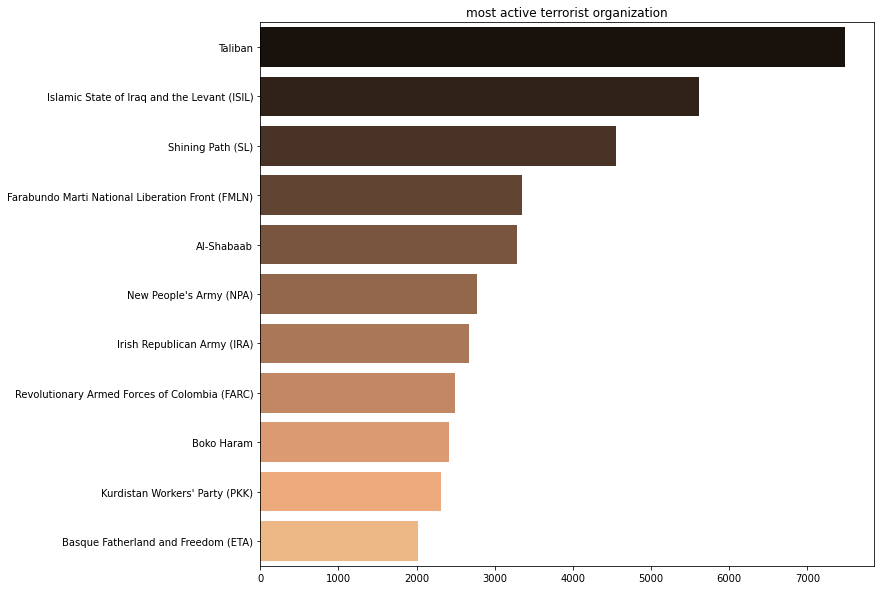

In [39]:
plt.subplots(figsize=(11,10))
sns.barplot(y=df['Terrorist_group'].value_counts()[1:12].index, x=df['Terrorist_group'].value_counts()[1:12].values, palette='copper')
plt.title('most active terrorist organization')
plt.show()